## Assignment 2
### Author: Olaf Placha

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

*** Solution ***

Ad 1 <br>
We have to show that $P(X \neq 0) = \frac{1}{2}$. Using symmetry our task comes down to showing that $\sum_{k=1}^\infty P(X=k)=\frac{1}{4}$. <br>
$\sum_{k=1}^\infty\frac{1}{4|k|(|k|+1)}=\frac{1}{4}\sum_{k=1}^\infty\frac{1}{k(k+1)}=\sum_{k=1}^\infty(\frac{1}{k}-\frac{1}{k+1})=\frac{1}{4}(1-\frac{1}{2}+\frac{1}{2}-\frac{1}{3}+\frac{1}{3}...)=\frac{1}{4}$

Ad 2 <br>
By definition $EX$ exists iif $\sum_{k\in(-\infty,\infty)}|k|P(X=k) <\infty$ <br>
Using symmetry the sum is equivalent to $\frac{1}{4}\sum_{k=1}^\infty\frac{1}{k+1}$, which is a non-convergent harmonic series. Therefore mean of the distribution does not exist.

Ad 3

In [51]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def return_probab(k):
    if k == 0:
        return 0.5
    return 1 / (4 * abs(k) * (abs(k) + 1))

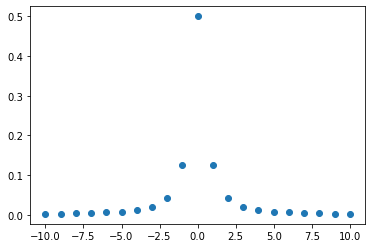

In [19]:
lower = -10
higher = 10
probabs = [return_probab(k) for k in range(lower, higher + 1)]
plt.scatter(range(lower, higher + 1), probabs)
plt.show()

Ad 4 <br>
We will use Inverse Sampling for Discrete Distribution. There are 2 cases: $X=0$ and $X \neq 0$, both with probability equal to $0.5$. <br> In the second case we also have 2 cases $X < 0$ and $X > 0$. <br> Let's consider the second case (the other one is symmetrial). To sample from that subspace, we can normalize probabilities for each $x \in \{1, 2, 3, ...\}$ by multiplying their probabilities by 4. Now $P(X'=k)=\frac{1}{k(k+1)}$. From that we can obtain $F(x) = P(X' \leq x) = \sum_{1\leq k \leq x}\frac{1}{k(k+1)}=1-\frac{1}{k+1}$. So sampling from that subspace comes down to finding minimum integer $k$ for which $r \leq 1 - \frac{1}{k+1}$, where r is sampled from uniform distribution on $(0,1)$. We can find such $k$ using the following formula $k=\lceil\frac{1}{1-r}-1\rceil$

In [60]:
def sample(n):
    """
    Sampling n values from the discrete distribution described above
    """
    randomArr = np.random.uniform(size=n)
    sampledArr = np.where(randomArr <= 0.5, 0, 1)
    #sample sign
    signArr = np.random.uniform(size=n)
    signedArr = np.where(signArr <= 0.5, -sampledArr, sampledArr)
    #apply logic presented above
    f = lambda x: x * np.ceil(1 / (1 - random.random()) - 1)
    fVectorized = np.vectorize(f)

    return fVectorized(signedArr)

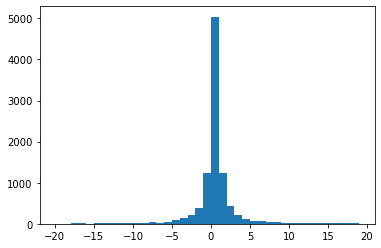

In [68]:
plt.hist(sample(10000), bins=range(-20,20))
plt.show()

In [96]:
def sanity_check(n):
    samples = sample(n)
    
    #let's print probability from the formula and derived from sampling
    formula = []
    derived = []
    for i in range(-20, 20 + 1):
        formula.append(return_probab(i))
        derived.append(np.sum(np.where(samples == i, 1, 0)) / n)
    plt.scatter(range(-20,21), derived, s=5)
    plt.scatter(range(-20,21), formula, s=5)

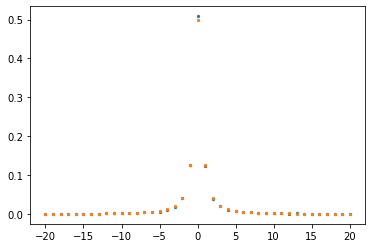

In [98]:
#using only 1e4 samples we accurately modeled the distribition
sanity_check(int(1e4))

Ad 5, 6

In [149]:
N = int(1e4)
sampled = sample(N)
means = []
for i in range(1, N + 1):
    means.append(np.mean(sampled[:i]))

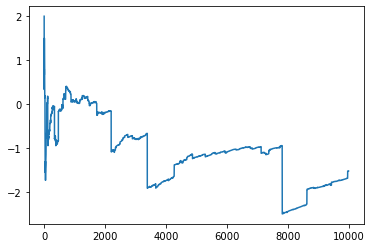

In [150]:
#mean doesn't converge
plt.plot(range(1, N + 1), means)
plt.show()

Ad 7, 8

In [155]:
N = int(1e4)
sampled = sample(N)
medians = []
for i in range(1, N + 1):
    medians.append(np.median(sampled[:i]))

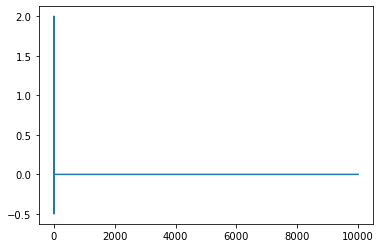

In [156]:
#median converges
plt.plot(range(1, N + 1), medians)
plt.show()

Ad 9 <br>
Mean coverges to the center of the distribution, thus it would be better in order to locate the center